# ABM COMMUNITY

The best way of viewing this notebook is via nbviewer: http://nbviewer.jupyter.org/github/izaromanowska/Emerging_community/blob/master/Supplementary_information.ipynb  Use the button at the top of the page to toggle the code on and off. 

This Jupyter notebook contains data analysis performed on the data collected in for of a survey of 65 self-identified archaeological agents-based modellers. The survey was run in December 2017 and January 2018. It can be found [here](https://github.com/izaromanowska/Emerging_community). 

The notebook presents all steps of analysis including a number of visualisations used to inform the research but not included in the final paper. 

This version does not include responses from participants who opted out from the sharing their data. The results may therefore differ slightly from the ones reported in the paper. These differences do not affect the general conclusions drawn from the survey.  

The notebook can be downloaded and run on any computer. Please ensure that you have installed Python 3 (compatibility with 2.7 has not been checked).

Would you have any questions please contact Iza Romanowska.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_palette('Set1')
sns.set(font_scale = 1.5)

import pandas as pd

In [2]:
# If you are using this notebook on your own computer please ensure you have a correct path  
# or that the notebook is saved in the same folder as the data.
data =  pd.read_csv('ABM_survey_data.csv')
data.columns = ['Timestamp','employment', 'age', 'gender', 
                'first_degree', 'first_ABM', 'software', 'learn_software', 
                'sim_spatial', 'sim_temporal', 'agent', 'tick', 
                'techniques', 'validation', 'ODD', 'GitHub', 'StackOverflow',
                'OpenABM','CAA_SIG', 'Santa_Fe', 'CCS', 'SAA', 'CAA_national', 
                'NetLogo_user', 'journal', 'collaboration', 'sci_heritage']

In [1]:
# Color palettes used in figures (from http://tristen.ca/hcl-picker/#/hlc/11/1/733A3C/C59343)
'''pal0 = ['#C59343','#2A7D83','#733A3C', '#576583'] 
sns.palplot(pal0)
pal01 = ['#733A3C','#784457','#6E5371','#576583','#377687',
         '#26847C','#408E67','#699550','#97963F','#C59343']
sns.palplot(pal01)
pal = ['#733A3C','#773E48','#784356','#754A63','#70526F',
       '#675A79','#5B6281','#4D6B85','#3E7387','#307A85',
       '#278180','#298678','#358B6F','#469063','#599358',
       '#6E954D','#849644','#9A963F','#B0953E']
sns.palplot(pal)
pal2 = ['#733A3C','#784354','#71506C','#5F607F','#447087',
        '#2A7D83','#2C8975','#4C9160','#72964B','#9C963F','#C59343']
sns.palplot(pal2)
pal3 =['#733A3C','#773E47','#784253','#76485F','#724E6A',
       '#6B5674','#625E7C','#576583','#4A6D86','#3C7487',
       '#2F7A85','#278080','#28867A','#318A71','#408E67',
       '#51925D','#639453','#76964A','#8A9642','#9E963E',
       '#B2953E','#C59343']
sns.palplot(pal3)
pal4 = ['#6B465F','#6A5D7D','#5C7796','#48C09D','#76D48A','#AFE376','#EFEE69']
sns.palplot(pal4)'''

"pal0 = ['#C59343','#2A7D83','#733A3C', '#576583'] \nsns.palplot(pal0)\npal01 = ['#733A3C','#784457','#6E5371','#576583','#377687',\n         '#26847C','#408E67','#699550','#97963F','#C59343']\nsns.palplot(pal01)\npal = ['#733A3C','#773E48','#784356','#754A63','#70526F',\n       '#675A79','#5B6281','#4D6B85','#3E7387','#307A85',\n       '#278180','#298678','#358B6F','#469063','#599358',\n       '#6E954D','#849644','#9A963F','#B0953E']\nsns.palplot(pal)\npal2 = ['#733A3C','#784354','#71506C','#5F607F','#447087',\n        '#2A7D83','#2C8975','#4C9160','#72964B','#9C963F','#C59343']\nsns.palplot(pal2)\npal3 =['#733A3C','#773E47','#784253','#76485F','#724E6A',\n       '#6B5674','#625E7C','#576583','#4A6D86','#3C7487',\n       '#2F7A85','#278080','#28867A','#318A71','#408E67',\n       '#51925D','#639453','#76964A','#8A9642','#9E963E',\n       '#B2953E','#C59343']\nsns.palplot(pal3)\npal4 = ['#6B465F','#6A5D7D','#5C7796','#48C09D','#76D48A','#AFE376','#EFEE69']\nsns.palplot(pal4)"

## General Information about the Survey

The survey was performed in December 2017 over a four week period. The survey was advertised via the CAA Complex Systems Simulation mailing list, via the simulatingcomplexity blog and via social media. Here we identify likely biases to the sample. The survey had a better potential of reaching:
+ Members of the authors’ professional networks;
+ English-speakers;
+ Younger researchers (due to the dissemination through digital media);
+ Male researchers (Moss-Racusin et al. 2012)*

In total, 65 people participated in the survey, which we consider to cover a significant proportion of ABM modellers in archaeology. The data has been made open access and we left the survey open so that it can be reused by other researchers [here](https://goo.gl/forms/imPq2AcS52FwTjZ83). 

*_We tried to counteract this one by personally inviting all female modellers we knew to take part in the survey._

#### Number of responses excluding the 'opt outs' 

In [4]:
len(data)

59

#### Time range

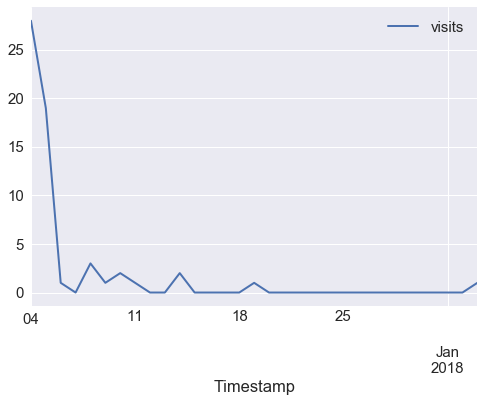

In [5]:
dates = pd.to_datetime(data['Timestamp'])
instances = pd.Series(1, index = range(len(dates)), name = 'visits',)
responses = pd.concat([dates, instances],  axis = 1)
responses.set_index('Timestamp', inplace = True)
responses.resample('1D').count().plot(linewidth = 2) # you can use '1H', 3H, 1D etc 


***Figure SI_1: Number of survey responses over time.***

## The people 

General description of the survey participants. 

### Gender

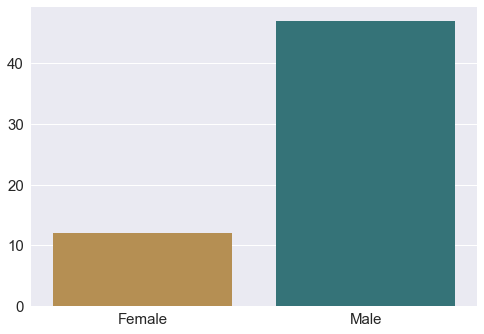

In [6]:
ax = sns.countplot(x='gender', 
              data=data, 
              palette = pal0)   
ax.set(xlabel='', ylabel = '') 

***Figure SI_2: Gender proportions among ABM modellers. ***

### Academic age

The 'academic age' is the number of years since the completion of the PhD. If the PhD is still ongoing the value is 0.

In [7]:
# This one is a bit more tricky because we used some non-numeric categories 
# that then sort alphabetically (so 1, 10, 11 instead of 1, 2, 3, etc). 
# We'll cast them into integer and then back. 
data['age'] = data.age.replace('-1 (I am actively studying for my terminal degree)' , '0')
data['age'] = data.age.replace('30-35' , '30') # will change the labels into correct values later on
data['age'] = data.age.replace('35-40' , '35') 
data['age'] = data.age.replace('40-50' , '40')
data['age'] = data.age.replace('50+ (really?)' , '50')
data['age'] = data.age.astype(int)

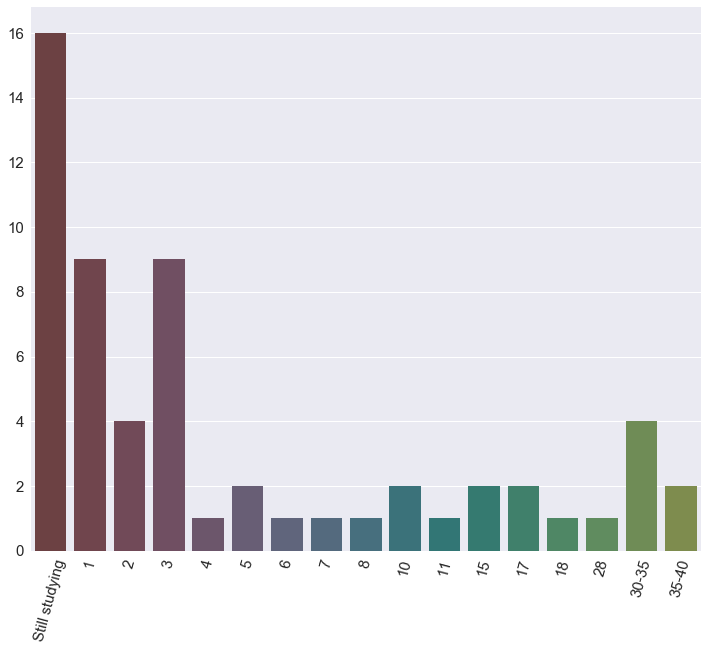

In [8]:
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.countplot(x='age', 
                   data=data, 
                   palette = pal)

# tidy up the labels back to their original values 
labels = [item.get_text() for item in ax.get_xticklabels()]
dic = {'0':'Still studying', '30':'30-35', '35':'35-40', '40':'40-50', '50':'over 50'}
labels = [dic[n] if n in dic else n for n in labels]
ax.set_xticklabels(labels)
plt.xticks(rotation=75)
ax.set(xlabel='', ylabel = '') 

***Figure SI_3: Academic age of ABM modellers in archaeology.***

(0, 47.065019597465927)

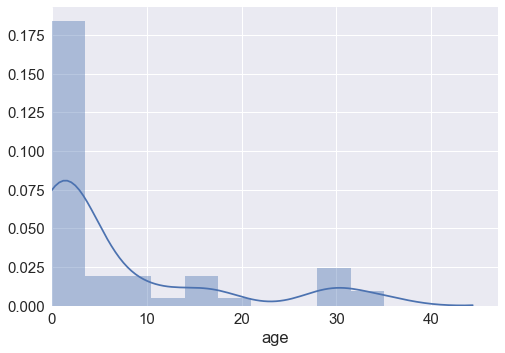

In [9]:
# As a distribution (note that the end bit is misleading because the final values are ranges)
sns.distplot(data.age, bins = 10)
plt.xlim([0,None])

***Figure SI_4: Academic age distribution among ABM modellers in archaeology.***

**Results:** ABM modellers are predominantly at the beginning of their career. A second peak falls around researchers who graduated in late 80s, early 90s. 
Note: This should be normalised per age distribution of all archaeologists since it is likely a general truth that there are more phd students than tenured professors. A rather outdated source (Zeder 1997) indicates that the trend is likely to be significant as the age distribution among professional archaeologists (in the US) follows a normal distribution centred around 40-49 age range. 

It is difficult to say at this point, whether the age pattern: a bimodal distribution (peak 1: phd students, peak 2: permanent academic staff) is because of established researchers coming from other disciplines into archaeology or as a result of earlier waves of simulation or, because of the 'fashionability' of ABM at the moment which makes established researchers hire phd students to do ABM for them. 

#### Age per gender

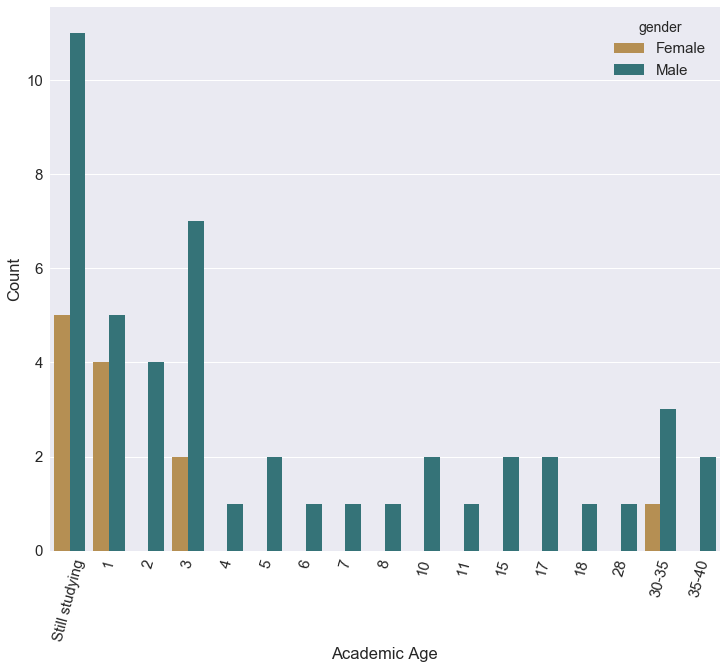

In [10]:
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.countplot(x='age', 
                   hue="gender",  
                   data=data, 
                   palette = pal0)

# tidy up the labels back to their original meanings 
labels = [item.get_text() for item in ax.get_xticklabels()]
dic = {'0':'Still studying', '30':'30-35', '35':'35-40', '40':'40-50', '50':'over 50'}
labels = [dic[n] if n in dic else n for n in labels]

ax.set_xticklabels(labels)
plt.xticks(rotation=75)
ax.set(xlabel='Academic Age', ylabel = 'Count') 

***Figure SI_5: Academic age of ABM modellers in archaeology per gender (counts).***

#### Age per gender: frequency plot

The count plots provide a general 'feeling' that female researchers predominantly fall in the 'younger' academic age brackets. To further confirm this notion, the counts were replaced with frequencies. Figure SI6 looks  similar to the plot above (SI_5), but note, how the bars for 0-3 years shifted between male/female.  In fact, over 40% of all female modellers are still in the process of obtaining their PhDs and over 90% can be classified as Early Career (<3 years since the graduation). While almost 30% of male modellers are established researchers (>10 years since the graduation).

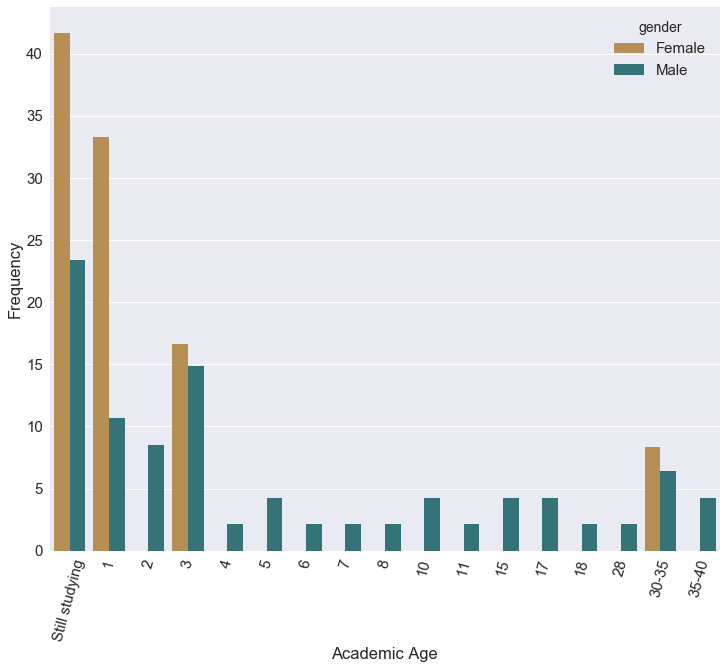

In [11]:
data_age = (data.groupby(['gender'])['age']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.barplot(x="age", 
                y="frequencies", 
                hue="gender", 
                data=data_age, 
                palette = pal0)

labels = [item.get_text() for item in ax.get_xticklabels()]
dic = {'0':'Still studying', '30':'30-35', '35':'35-40', '40':'40-50', '50':'over 50'}
labels = [dic[n] if n in dic else n for n in labels]
ax.set_xticklabels(labels)
plt.xticks(rotation=75)

ax.set(xlabel='Academic Age', ylabel='Frequency')


***Figure SI_6: Academic Age distribution per gender among ABM modellers in archaeology.***

Here are the exact numbers:

In [12]:
from IPython.display import display
pd.options.display.max_columns = None
display(data_age.sort_values(by ='age').T)
print('Percentage of established male modellers: ', data_age[data_age.gender == 'Male']['frequencies'].tail(8).sum())

,0,4,1,6,7,2,5,14,9,15,16,17,10,18,11,12,19,20,8,3,13
gender,Female,Male,Female,Male,Male,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
age,0,0,1,1,2,3,3,4,5,6,7,8,10,11,15,17,18,28,30,30,35
frequencies,41.6667,23.4043,33.3333,10.6383,8.51064,16.6667,14.8936,2.12766,4.25532,2.12766,2.12766,2.12766,4.25532,2.12766,4.25532,4.25532,2.12766,2.12766,6.38298,8.33333,4.25532


Percentage of established male modellers:  29.78723404255319


***Table SI_1: Age breakdown per gender. ***

To summarise, the distributions of age per gender (Fig. SI_7) shows a much stronger disproprtion between ECRs and established researchers among women than among men.

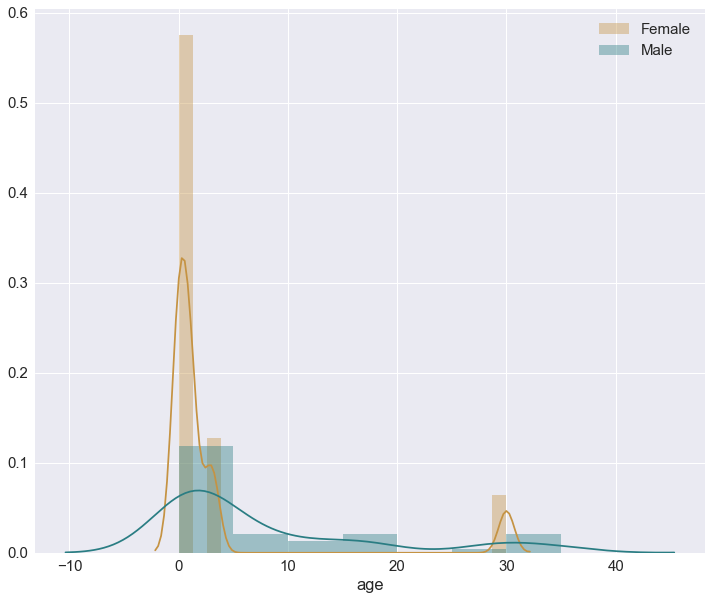

In [13]:
plt.figure(figsize = (12,10))
sns.distplot(data[data.gender == 'Female'].age,  
             label = 'Female', 
             color = pal0[0])
sns.distplot(data[data.gender == 'Male'].age,  
             label = 'Male', 
             color = pal0[1])
plt.legend()


***Figure SI_7: Academic age distribution per gender among ABM modellers in archaeology.***


### Current Employment

In [14]:
# tidy up the non-standard responses and answers that are unnecesarily long.
data['employment'] = data.employment.replace('Recent masters graduate ' , 'Other non-academic position')
data['employment'] = data.employment.replace("I've just finished my PhD, now a data scientist (not using ABMs anymore)" , 'Other non-academic position')
data['employment'] = data.employment.replace('undergrad' , 'Other')
data['employment'] = data.employment.replace('research associate' , 'Other academic position')
data['employment'] = data.employment.replace('Academic Appointment (non-tenured/not permanent)' , 'Temporary Academic Position')
data['employment'] = data.employment.replace('Academic Appointment (tenured/permanent position)' , 'Permanent Academic Position')


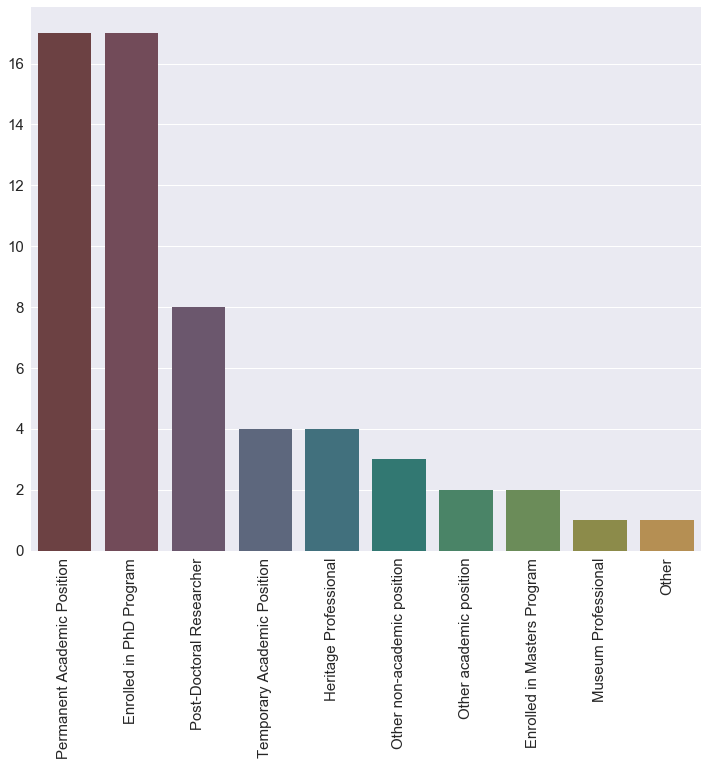

In [15]:
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.countplot(x='employment', 
                   data=data, 
                   order = data['employment'].value_counts().index, 
                   palette = pal01)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 


***Figure SI_8: Employment type among ABM modellers in archaeology.***


There is an interesting pattern of relatively high proportion of survey respondents holding permanent academic position. Here we break down the current employment by age. Not surprisingly, PHD students are predominantly academically young, while permantent academic position span over the full range. Interestingly there is quite a few academically young individuals who hold a permanent position. 

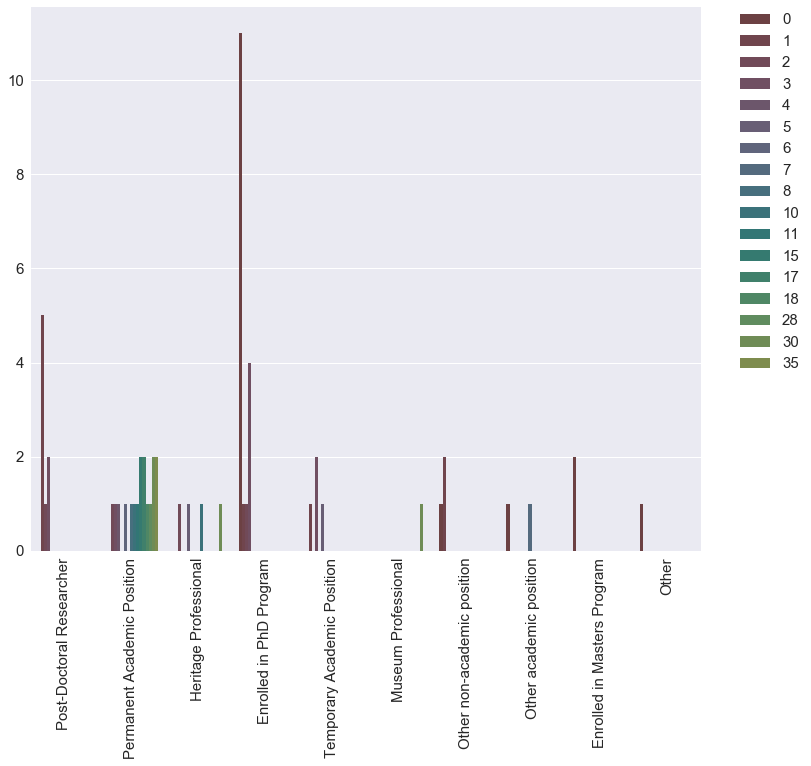

In [16]:
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.countplot(x='employment', 
                   hue="age", 
                   data=data,
                  palette = pal)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


***Figure SI_9: Employment type among ABM modellers in archaeology per age.***


Here we break it down by gender. Not surprisingly women do not hold many permanent positions. This is to some extent a result of their ECR status. However, it is not possible to decide what is the cause and what is the effect using this dataset.

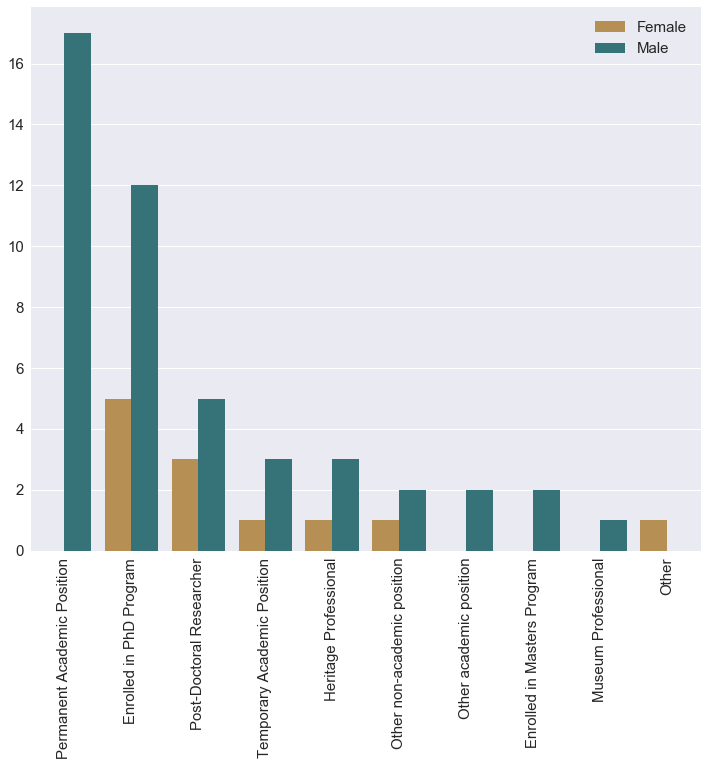

In [17]:
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.countplot(x='employment', 
                   hue="gender", 
                   order = data['employment'].value_counts().index, 
                   data=data, 
                   palette = pal0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend (loc = 1)
ax.set(xlabel='', ylabel = '') 

***Figure SI_10: Employment type among ABM modellers in archaeology per gender (counts).***

The same graph showing frequencies.


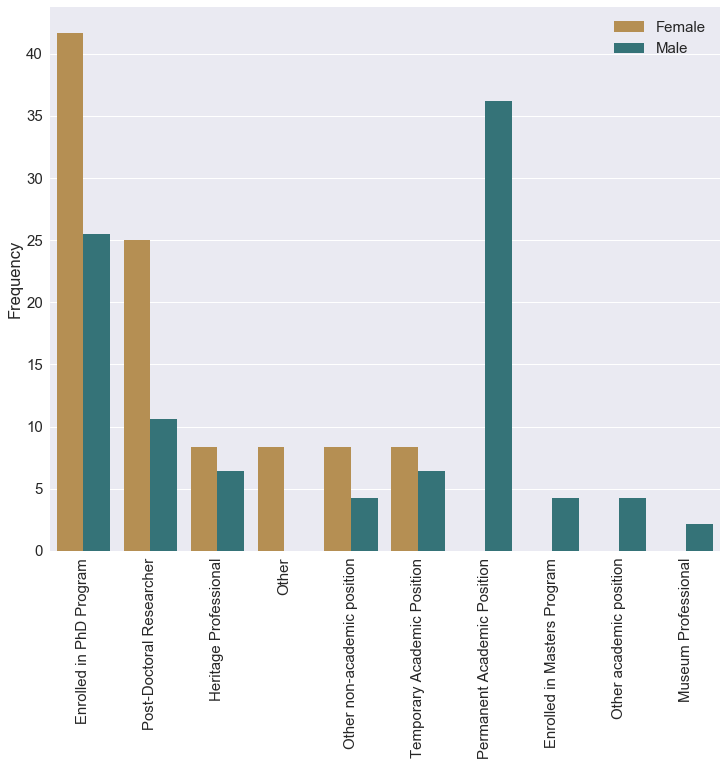

In [18]:
data_emp = (data.groupby(['gender'])['employment']
                     .value_counts(normalize=True)
                     .rename('frequency')
                     .mul(100)
                     .reset_index())

fig, ax = plt.subplots(figsize = (12,10))

ax = sns.barplot(x="employment", 
                y="frequency", 
                hue="gender", 
                data=data_emp, 
                palette = pal0)

plt.xticks(rotation=90)
plt.legend (loc = 1)
ax.set(xlabel='', ylabel='Frequency')

***Figure SI_11: Employment type among ABM modellers in archaeology per gender (frequencies).***


In [19]:
display(data_emp)

,gender,employment,frequency
0,Female,Enrolled in PhD Program,41.666667
1,Female,Post-Doctoral Researcher,25.000000
2,Female,Heritage Professional,8.333333
3,Female,Other,8.333333
4,Female,Other non-academic position,8.333333
5,Female,Temporary Academic Position,8.333333
6,Male,Permanent Academic Position,36.170213
7,Male,Enrolled in PhD Program,25.531915
8,Male,Post-Doctoral Researcher,10.638298
9,Male,Heritage Professional,6.382979


***Table SI_2: Employment per gender.***


### Academic background

Most of archaeological modellers are archaeologists and anthropologists by training. 

In [20]:
degrees = {'Archaeology': 'Humanities', 
           'Anthropology': 'Humanities',
           'Anthropology and Archaeology': 'Humanities', 
           'Anthropology (Archaeology) and Art Studio': 'Humanities',
           'History': 'Humanities',
           'General Studies': 'Humanities',
           'Other Humanities (e.g. Classics)': 'Humanities', 
           'Geography':'Social Science', 
           'Operations Research':'Social Science', 
           'Other Social Sciences (e.g. Sociology, Psychology)':'Social Science', 
           'Biology': 'Life Science',
           'Bioinformatics': 'Life Science',
           'computer science and biology': 'Life Science', 
           'Earth Sciences': 'Life Science', 
           'Environmental Sciences':'Life Science',
           'Computer Science':'STEM',
           'Physics':'STEM',
           'Engineering': 'STEM', 
           'Mathematics':'STEM'

       }
data['degree_cat']= data.first_degree.map(degrees)

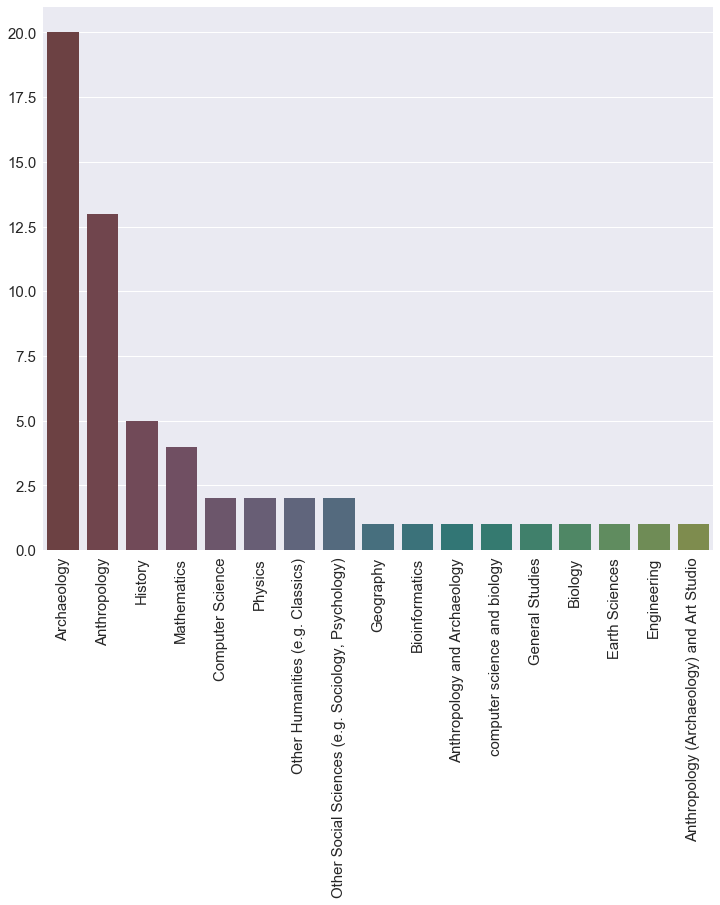

In [21]:
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.countplot(x='first_degree', 
                   data=data, 
                   order = data['first_degree'].value_counts().index, 
                   palette = pal
                  )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 

***Figure SI_12: First degree of ABM modellers in archaeology.***


#### Break down of acadmic background using wider categories

The categories and classification of disciplines is broadly based on https://en.wikipedia.org/wiki/Branches_of_science
However, some of the decisions have been arbitrarily taken by the authors when one discipline spans several branches of science. For example, geography can be classified as social science, as life science or as a STEM subject depending on the subcategory such as 'social geography' or GIS. 

Fig. SI_13 shows that most of ABM modellers are native archaeologists/anthropologists. There is a surprisingly weak presence of social sciences and not much higher level of life sciences, subjects that naturally coincidence with archaeology in many topics, scales of analysis and methods (e.g., ecology). The relatively higher number of STEM trained modellers may be a reflection of the need for hard coding skills.  

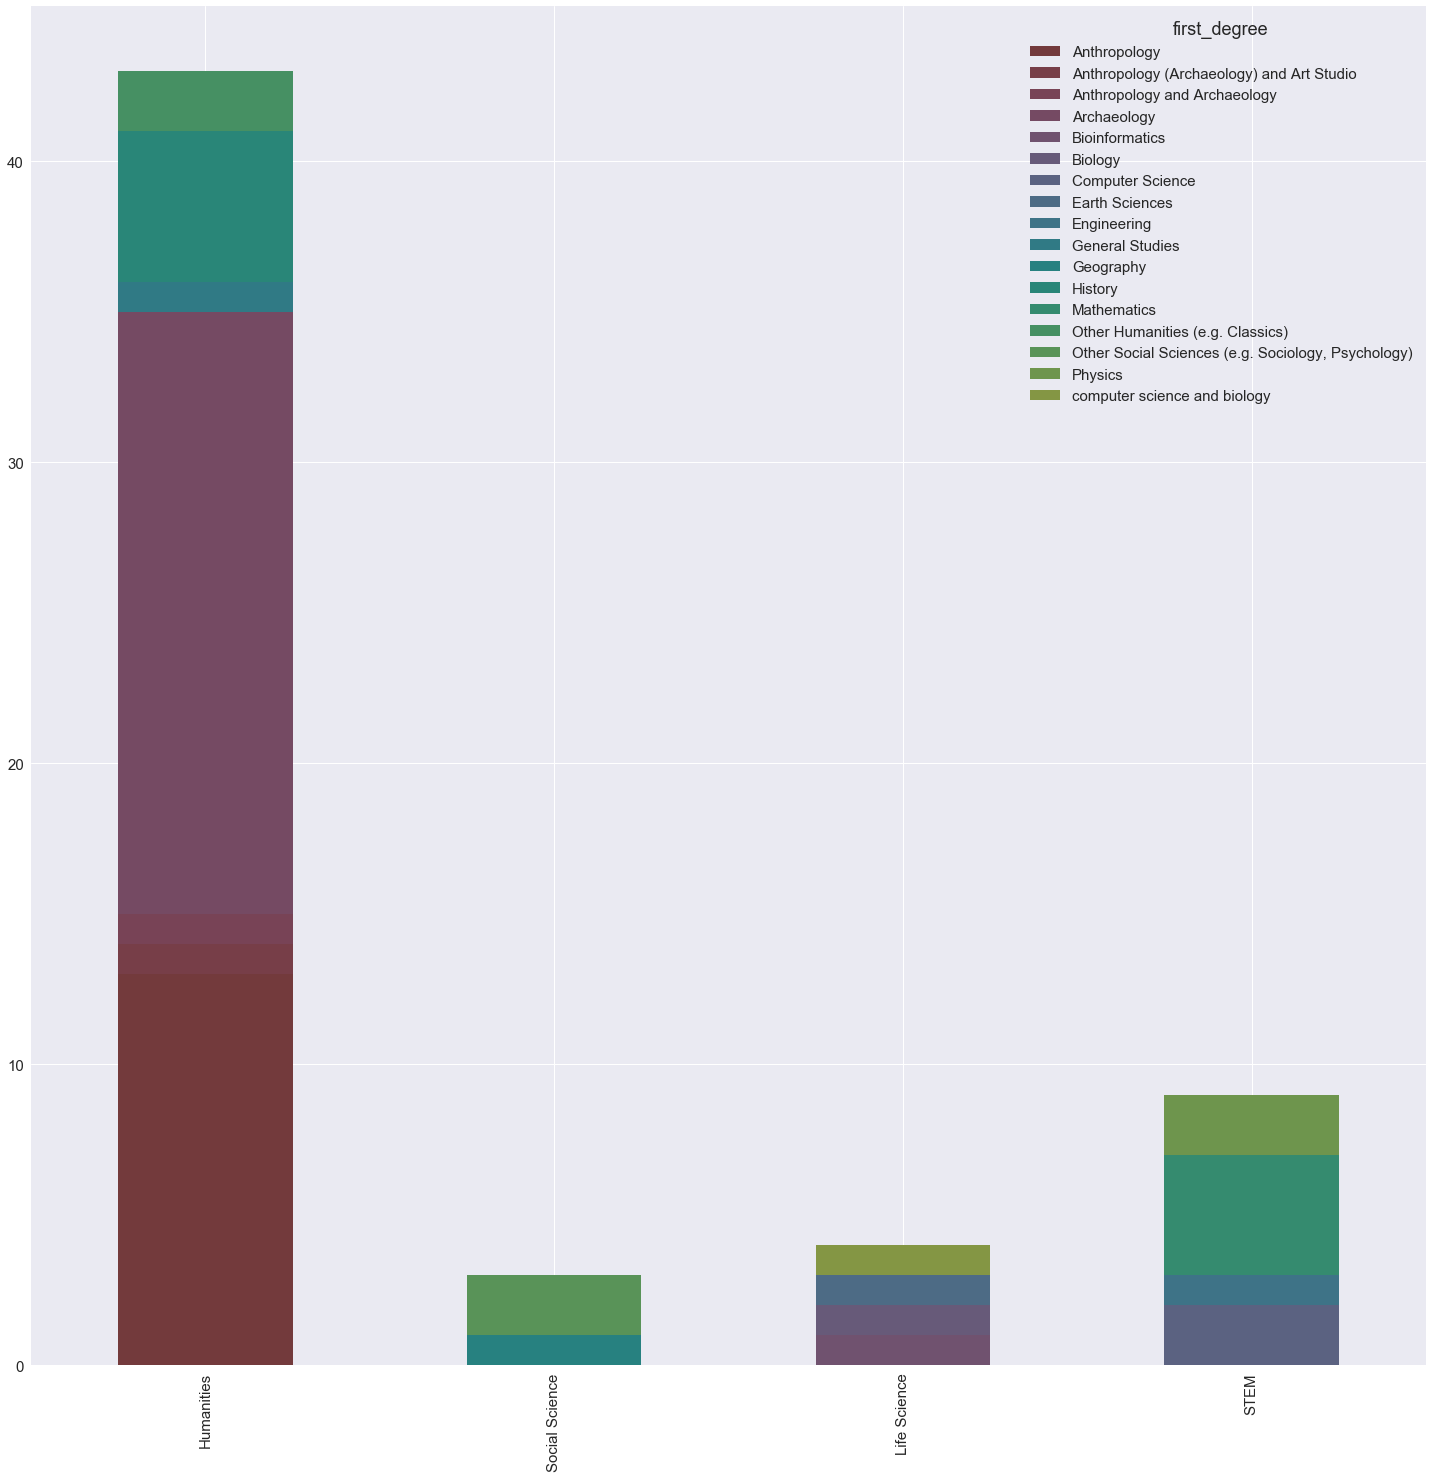

In [22]:
sns.set_palette(pal)
key = ['Humanities', 'Social Science', 'Life Science', 'STEM']

data.groupby(['degree_cat', 'first_degree']).size().unstack().loc[key].plot(kind='bar', 
                                                                            stacked=True, 
                                                                            figsize = (25,25))
handles, labels = plt.gca().get_legend_handles_labels()


plt.xlabel('')

***Figure SI_13: First degree of ABM modellers grouped into wider branches of science.***


In [23]:
# Note: the colour palettes and order of subcategories were manually adjusted for the figures presented in the paper.
# The differences are not analytically significant so have been left out from the code above. 
# However, for the sake of full reproducibilty (and in case it may be useful for others), 
# here is the full code used to get the figure presented in the paper.
'''
pal = ['#733A3C','#773E48','#784356','#754A63','#70526F',
       '#675A79','#5B6281','#4D6B85','#3E7387','#307A85',
       '#278180','#298678','#358B6F','#469063','#599358',
       '#6E954D','#849644','#9A963F','#B0953E']
       
order1 = [0, 1, 2, 3, 10, 11, 15, 12, 16, 13, 4, 7, 5, 17, 8, 6, 9, 18, 14]
pal1 = [ pal[i] for i in order1]
sns.set_palette(pal1)

key = ['Humanities', 'Social Science', 'Life Science', 'STEM']
ax = data.groupby(['degree_cat', 'first_degree']).size().unstack().loc[key].plot(kind='bar', stacked=True, figsize = (25,25))
handles, labels = plt.gca().get_legend_handles_labels()
order2 = [0, 1, 2, 3, 10, 12, 15, 11, 14, 16, 4, 5, 7, 9, 18, 6, 8, 13, 17]

plt.legend([handles[idx] for idx in order2],[labels[idx] for idx in order2])
ax.set(xlabel='', ylabel = '') 
plt.savefig('figures/degrees.png')
'''

"\npal = ['#733A3C','#773E48','#784356','#754A63','#70526F',\n       '#675A79','#5B6281','#4D6B85','#3E7387','#307A85',\n       '#278180','#298678','#358B6F','#469063','#599358',\n       '#6E954D','#849644','#9A963F','#B0953E']\n       \norder1 = [0, 1, 2, 3, 10, 11, 15, 12, 16, 13, 4, 7, 5, 17, 8, 6, 9, 18, 14]\npal1 = [ pal[i] for i in order1]\nsns.set_palette(pal1)\n\nkey = ['Humanities', 'Social Science', 'Life Science', 'STEM']\nax = data.groupby(['degree_cat', 'first_degree']).size().unstack().loc[key].plot(kind='bar', stacked=True, figsize = (25,25))\nhandles, labels = plt.gca().get_legend_handles_labels()\norder2 = [0, 1, 2, 3, 10, 12, 15, 11, 14, 16, 4, 5, 7, 9, 18, 6, 8, 13, 17]\n\nplt.legend([handles[idx] for idx in order2],[labels[idx] for idx in order2])\nax.set(xlabel='', ylabel = '') \nplt.savefig('figures/degrees.png')\n"

#### Breakdown of first degree per gender

The background of male and female researchers is fairly similar. Obviously less diverse for femals due to their generally lower numbers.

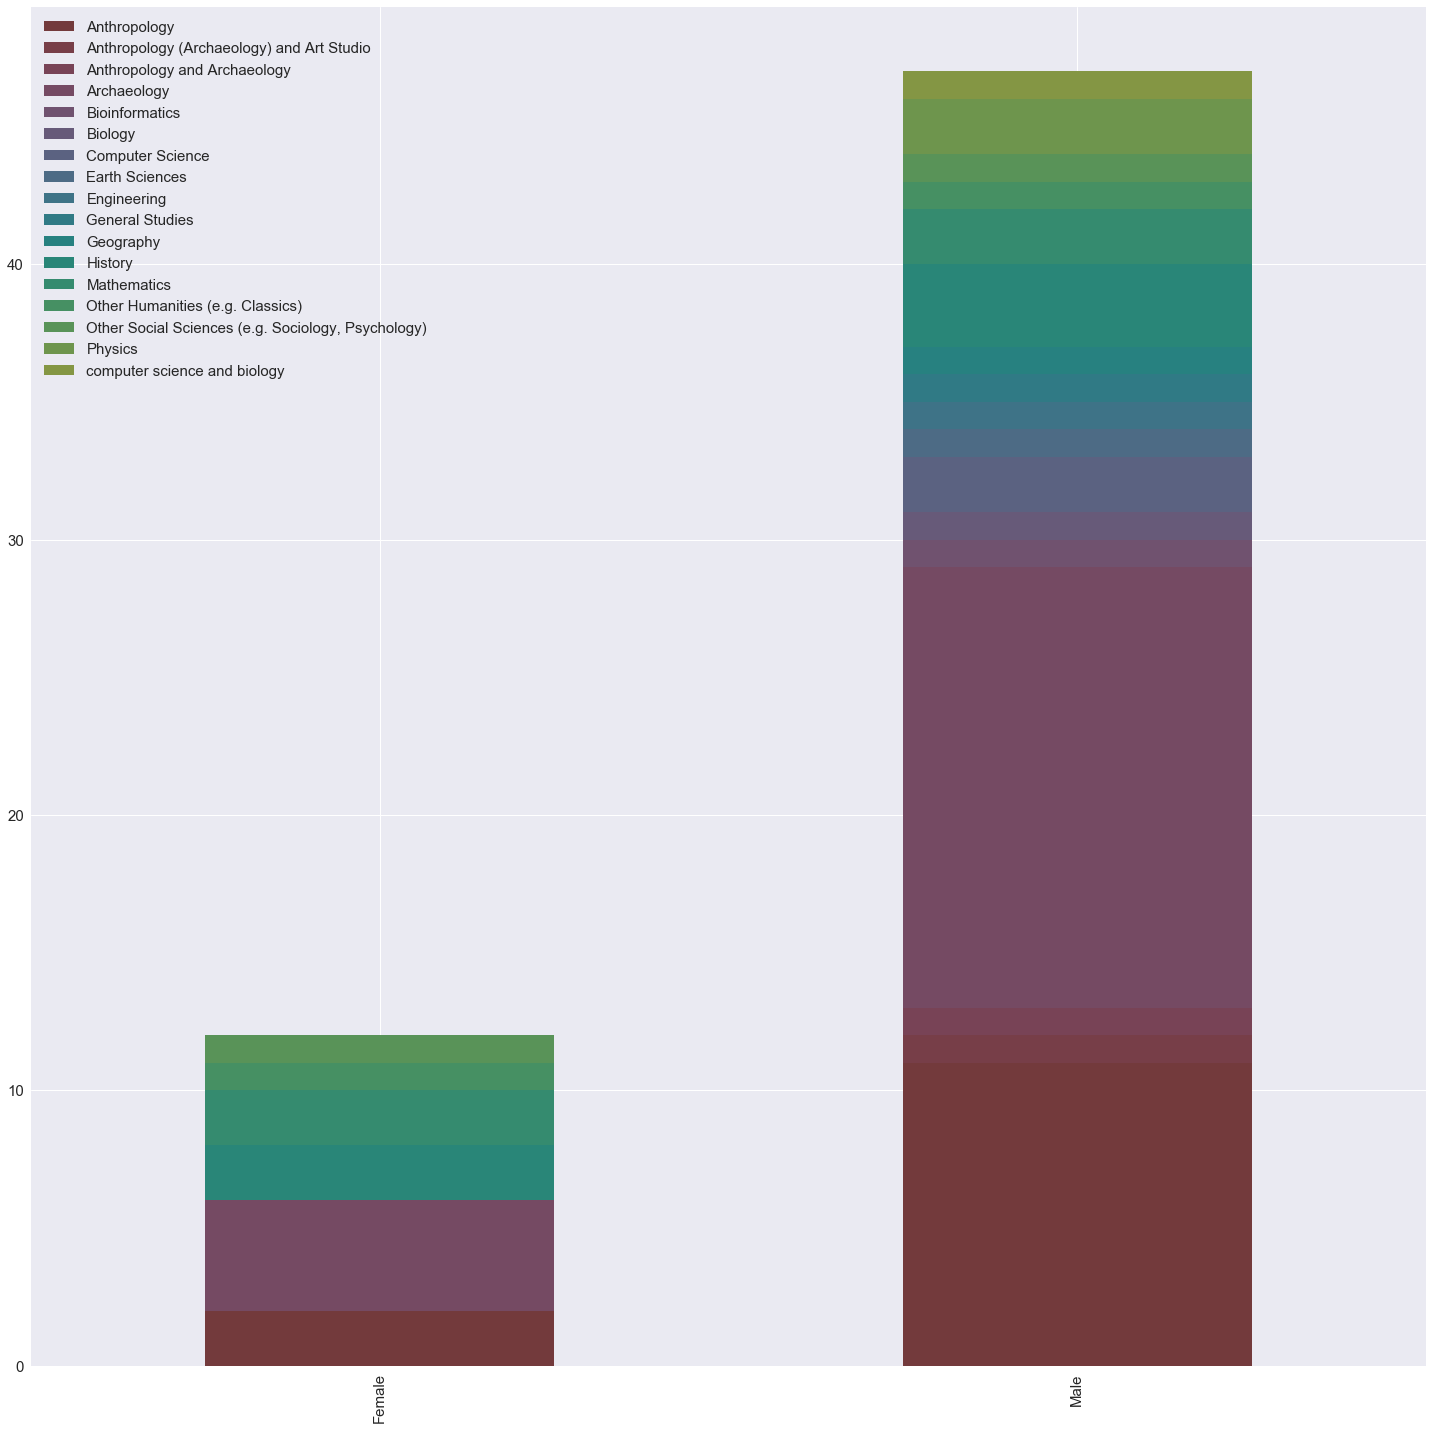

In [24]:
ax = (data.groupby(['gender', 'first_degree'])
      .size()
      .unstack()
      .plot(kind='bar',
            stacked=True, 
            figsize = (25,25)))
l = ax.legend(loc = 0)
l.set_title('')

ax.set(xlabel='', ylabel = '') 

***Figure SI_14: First degree of ABM modellers in archaeology per gender.***


### Academic heritage

We asked the repondents to point to ONE school of thought as the most influencial in their research practice. The answers can be categorised into four bins: Complexity Science, Evolutionary Theory, Other theoretical frameworks filtered through the archaeological lense and Simulation as a technique (without any theoretical framework behind it). 

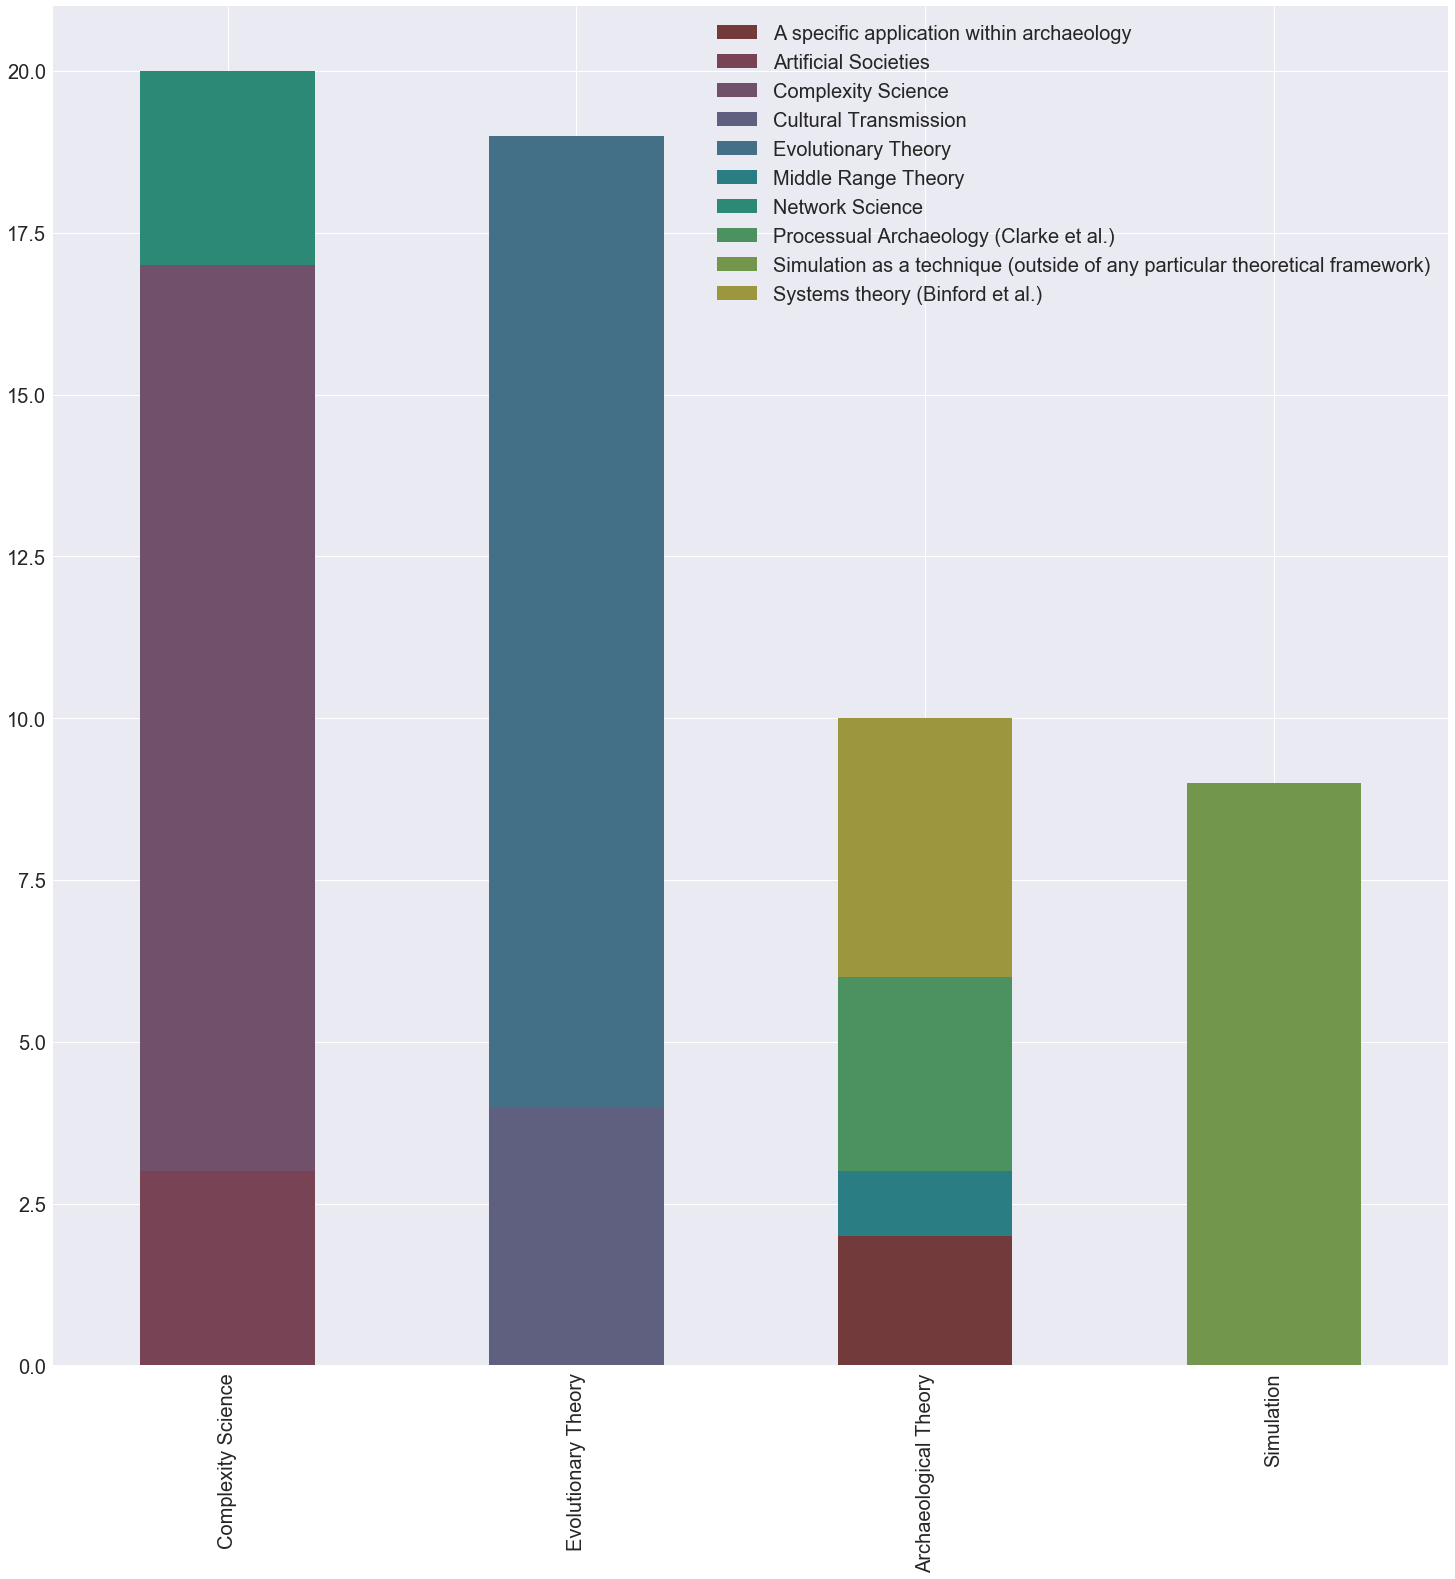

In [25]:
sns.set(font_scale = 2)
sns.set_palette(pal2)

schools = {'Complexity Science': 'Complexity Science', 
          'Artificial Societies': 'Complexity Science', 
          'Network Science' : 'Complexity Science',
          'Evolutionary Theory' : 'Evolutionary Theory', 
          'Cultural Transmission': 'Evolutionary Theory',
          'Processual Archaeology (Clarke et al.)' : 'Archaeological Theory', 
          'Systems theory (Binford et al.)' : 'Archaeological Theory', 
          'Middle Range Theory' : 'Archaeological Theory', 
          'A specific application within archaeology' : 'Archaeological Theory',
          'Simulation as a technique (outside of any particular theoretical framework)': 'Simulation', 

       }
data['heritage_cat']= data.sci_heritage.map(schools)

key2 = ['Complexity Science', 'Evolutionary Theory', 'Archaeological Theory', 'Simulation']

ax = (data.groupby(['heritage_cat', 'sci_heritage'])
      .size()
      .unstack()
      .loc[key2]
      .plot(kind='bar', 
            stacked=True, 
            figsize = (25,25)))

ax.set(xlabel='', ylabel = '') 
l = ax.legend()
l.set_title('')

***Figure SI_15: Main theoretical framework used by ABM modellers in archaeology.***


In [26]:
display(data['heritage_cat'].value_counts(normalize = True).mul(100))

Complexity Science       34.482759
Evolutionary Theory      32.758621
Archaeological Theory    17.241379
Simulation               15.517241
Name: heritage_cat, dtype: float64

***Table SI_3: use of different theoretical frameworks by ABM modellers in archaeology***

Conclusion: Complexity science and evolutionary theory are two main sources of influence. Surprisingly, even closely aligned theoretical frameworks in archaeology (e.g., systems theory) do not seem to have as much impact as would be expected. 

### Education and training 

We asked the repspondents to describe how they have learnt about ABM. Only 17% have came accross it as part of their degree or other formal training, and almost a third have independently stumbled upon it.

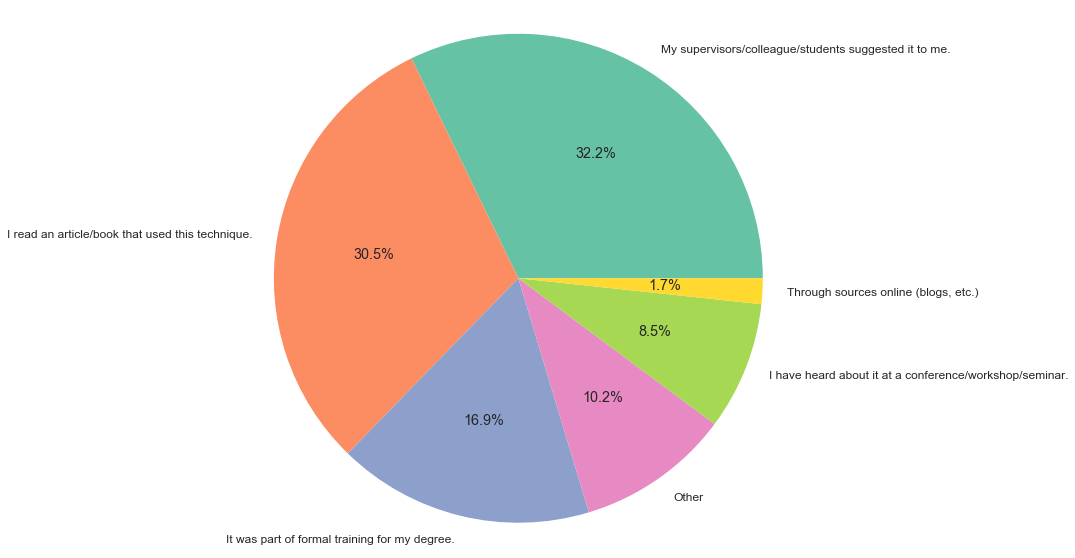

In [27]:
# tidy up the data
data['first_ABM'] = data.first_ABM.replace('I took a course at the Santa Fe Institute when I was 16 for my High School' , 'Other')
data['first_ABM'] = data.first_ABM.replace('gaming, when I was a teenager' , 'Other')
data['first_ABM'] = data.first_ABM.replace('In applying for my current PhD program' , 'Other')
data['first_ABM'] = data.first_ABM.replace("Don't remember " , 'Other')
data['first_ABM'] = data.first_ABM.replace("friend was using it" , 'My supervisors/colleague/students suggested it to me.')
data['first_ABM'] = data.first_ABM.replace("Santa F̩ Institute's introductory course on complexity" , 'Other')
data['first_ABM'] = data.first_ABM.replace('through hanging out at SFI in the early 1990s' , 'Other')

sns.set(font_scale = 1.2)
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize = (12,10))

# Plot
ax = data.first_ABM.value_counts().plot(kind = 'pie', 
                                        y = 'first_ABM', 
                                        autopct='%1.1f%%')
ax.axis('equal')
ax.set(xlabel='', ylabel = '') 

***Figure SI_16: How did you come accross ABM?***

In [28]:
"""
# This is the same figure but in form of a barplot
ax = sns.countplot(x='first_ABM', 
                   data=data, 
                   order = data['first_ABM'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 
"""

"\n# This is the same figure but in form of a barplot\nax = sns.countplot(x='first_ABM', \n                   data=data, \n                   order = data['first_ABM'].value_counts().index)\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\nax.set(xlabel='', ylabel = '') \n"

The majority of modellers have acquired the technical skills themselves ('self-taught'), with or without peer and supervisor support. 

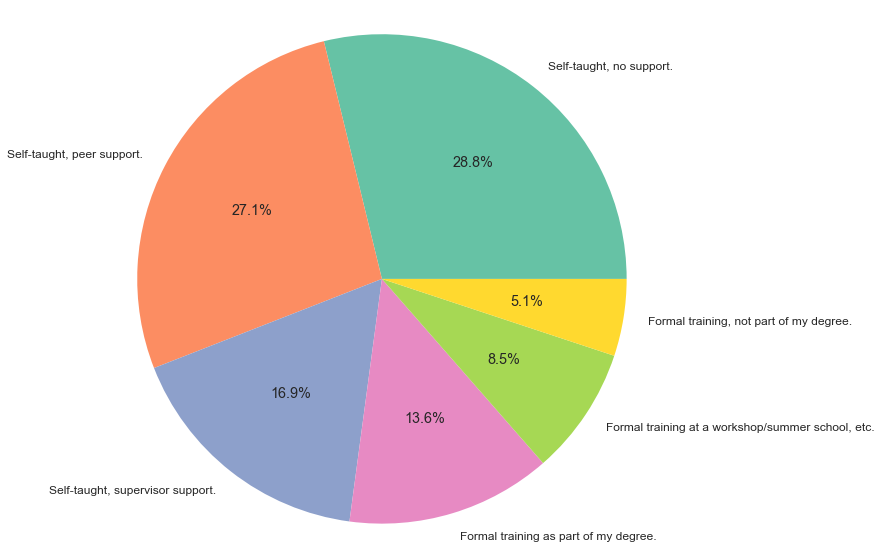

In [29]:
# Tidy up data
data['learn_software'] = data.learn_software.replace("Combination of self-taught and workshops" , 'Formal training at a workshop/summer school, etc.')
data['learn_software'] = data.learn_software.replace('Mostly self-taught with some formal trainning, not part of my degree (e.g., short special courses, not part of any degree)' , 'Formal training, not part of my degree (e.g., you attended a course at a different faculty without gaining credits)')
data['learn_software'] = data.learn_software.replace('Formal training, not part of my degree (e.g., you attended a course at a different faculty without gaining credits)', 'Formal training, not part of my degree.')

# Plot
fig, ax = plt.subplots(figsize = (12,10))

ax = data.learn_software.value_counts().plot(kind = 'pie', 
                                             y = 'learn_software', 
                                             autopct='%1.1f%%')
ax.axis('equal')
ax.set(xlabel='', ylabel = '') 

***Figure SI_17: Sources of coding training. ***

In [30]:
"""
# This is the same figure but in form of a barplot
ax = sns.countplot(x='learn_software', 
                   data=data, 
                   order = data['learn_software'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 
"""

"\n# This is the same figure but in form of a barplot\nax = sns.countplot(x='learn_software', \n                   data=data, \n                   order = data['learn_software'].value_counts().index)\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\nax.set(xlabel='', ylabel = '') \n"

## The simulations

In this section we will look at the research undertaken by the current ABM community, and the tools and techniques they use. 

## Tools  

In terms of modelling platforms Netlogo dominates followed by general purpose programming languages. Other ABM platforms (Repast, Mason, AnyLogic) are not commonly used. 

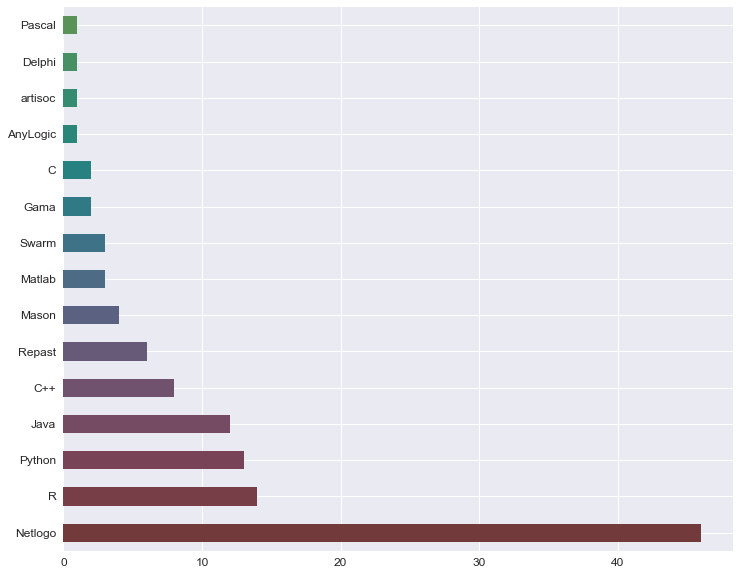

In [31]:
fig, ax = plt.subplots(figsize = (12,10))

ax = (data.software
      .str
      .split(', ', expand=True)
      .replace('Gama Platform' , 'Gama')
      .stack()
      .value_counts()
      .plot(kind = 'barh', color = pal))

***Figure SI_18: Programming languages and platform used by ABM modellers in archaeology.***

#### Breakdown by gender (using frequencies)

There is little difference between male and female researchers. Matlab and Delphi are used more widely among female researchers, while AnyLogic, C, Mason, Pascal, artisoc among male researchers. However, these differences may not be significant given the very low numbers. 

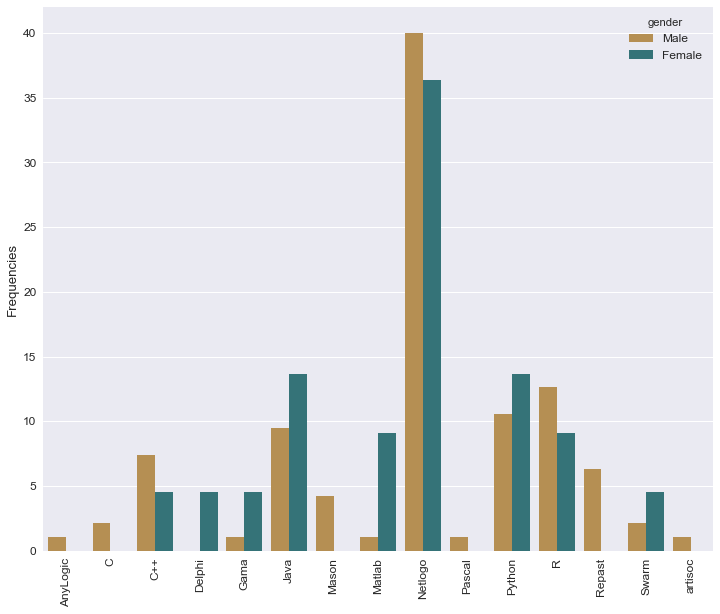

In [32]:
# This is a bit more tricky than usual, because the answeres were multiple choice 
# so more than one value can be present in each cell
# split the values and tidy up
soft = data.software.str.split(', ', expand=True).replace('Gama Platform' , 'Gama')
new_df = pd.concat((soft, data.gender), axis =1)
new_df.columns = list('ABCDEF')+['gender']

# melt it into a long data
soft_melted = pd.melt(new_df, id_vars=['gender'], value_vars=list('ABCDEF'))

# groupby to get frequencies per gender
data_soft = (soft_melted.groupby(['gender'])['value']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('value'))

# plot
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.barplot(x="value", 
                 y="frequencies", 
                 hue="gender", 
                 data=data_soft, 
                 palette = pal0)
plt.xticks( rotation=90)
ax.set(xlabel='', ylabel = 'Frequencies') 

***Figure SI_19: Programming languages and platform used by ABM modellers in archaeology per gender.***

#### Breakdown by background 

Results: Modellers with STEM background are less likely to use Netlogo and more likely to use other simulation platforms. General purpose languages used equally by all disciplines. 

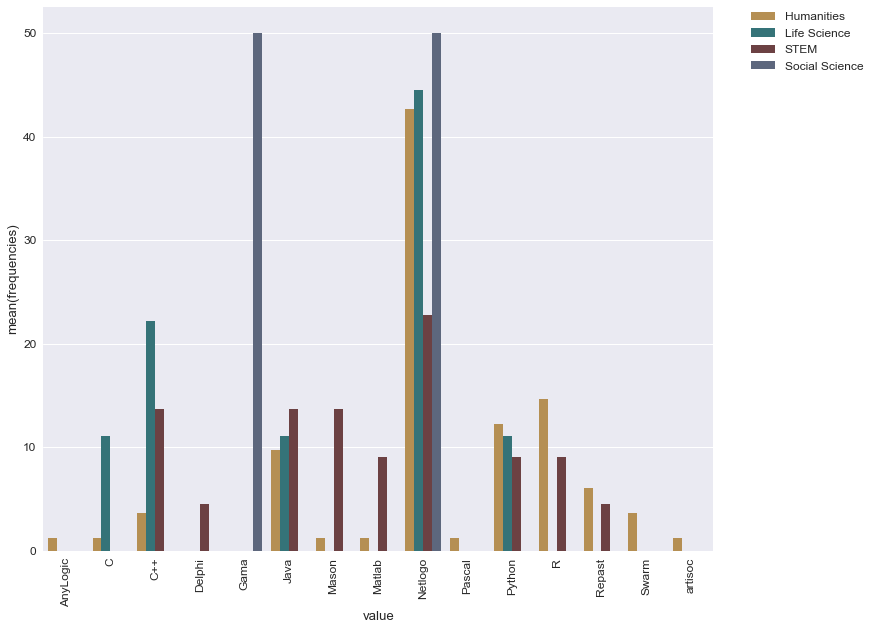

In [33]:
# Melt into long data
new_df = pd.concat((soft, data.degree_cat), axis =1)
new_df.columns = list('ABCDEF')+ ['background']
softB_melted = pd.melt(new_df, id_vars=['background'], value_vars=list('ABCDEF'))

# Group by background
data_soft = (softB_melted.groupby(['background'])['value']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('value'))

# Plot
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.barplot(x="value", 
                 y="frequencies", 
                 hue="background", 
                 data=data_soft, 
                 palette = pal0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

***Figure SI_20: Programming languages and platform used by ABM modellers in archaeology per background.***

### Collaborations 

This is only data preparation script, the figure was created using: http://app.rawgraphs.io/  Alluvial Diagram, with the following input: 
+ 'degree_cat' -> 'colab_cat' (categorised into larger scientific categories). 

The 'size' variable has been left uniform.

In [34]:
colab = data.collaboration.str.split(', ', expand=True)#.replace('Gama Platform' , 'Gama')
col_df = pd.concat((colab, data.degree_cat), axis =1)
columns = list(col_df.columns)

col = pd.melt(col_df, id_vars=['degree_cat'], value_vars=columns[:-1])
# remove non-collaborators
value_list = ['na', 'So far', 'Na', 'I have not collaborated with other specialists', 'No', 'Nope', 'None ever', 'None', 'none', 'or similar', "I'm both archeaologist and computer scientist",'silly question!']
col = col[~col.value.isin(value_list)]

# categorise
colabs ={
        'Archaeologists':'Humanities',
        'only archaeologists':'Humanities',
        'social/cultural anthropology':'Humanities',
        'anthropology':'Humanities',   
        'Philosophy' :'Humanities',
        'history':'Humanities',
        'palaeoanthropology':'Humanities',
        'sociology':'Social Science',
        'Econometry':'Social Science' , 
        'cognitive science':'Social Science',
        'behavioural science':'Social Science', 
        'historical demography':'Social Science', 
        'political science':'Social Science',
        'biology': 'Life Science',
        'palaeontology':'Life Science',
        'ecology':'Life Science',
        'genetics': 'Life Science',
        'physical geography':'Life Science',    
        'environmental science': 'Life Science', 
        'climate science':'Life Science',    
        'geographic information science': 'STEM', 
        'computer science': 'STEM', 
        'mathematics': 'STEM',
        'physics': 'STEM',
        'geochemistry': 'STEM',
        'geology': 'STEM', 
        'geomorphology': 'STEM', 
       }
col['colab_cat']= col.value.map(colabs)
col = col.dropna(how='any')
col.to_csv('collaboration.csv', index_label = 'id')

The left hand side of the graph shows the academic background of the surveyed researchers, while the right hand side the background of their collaborators. This was a multiple choice question so respondents could choose more than one category. lLife Sciences and STEM are the two main collaboration targets with limited collaboration flows between researchers in Humanities and Social Sciences. This pattern may be caused by researchers looking for skills complementary to theirs; for example, humanities will look for technical skills, rather than for people with similar, i.e., humanities or social science skills. 

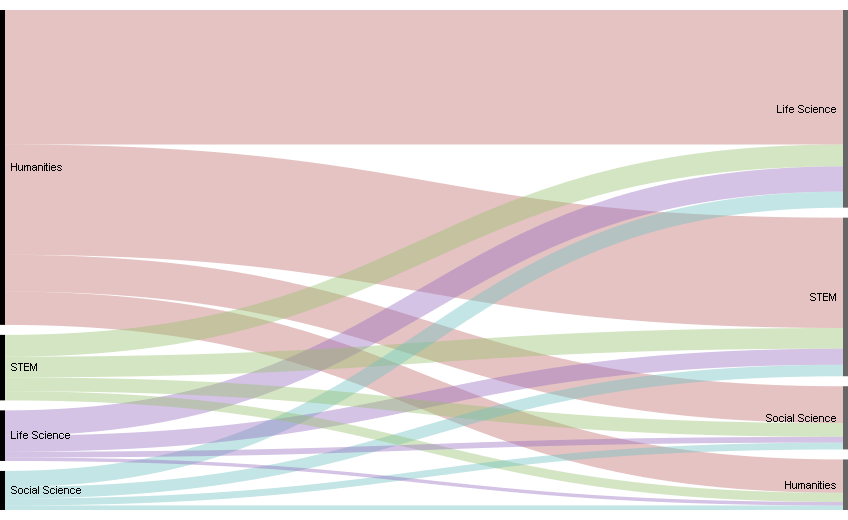

In [35]:
from IPython.display import Image
Image("figures/colaborations.png")

***Figure SI_21: Collaboration flows between ABM modellers (left hand side) and their project partners (right hand side).***

### The simulations: spatial and temporal range

We asked the respondents to refer to their LAST simulation while answering the following three questions. The spatial and temporal categories used here come from the SAA classification scheme.

In terms of the geographical focus, most of the simulations concerned Europe. A similarly high proportion (20%) were set in an abstract space. Americas, Asia and Oceania were much less popular. This is surprising since the majority of the most prolific ABM research centers and labs are located in North America. It is unlikely that this is the relic of the survey methodology since the authors academic networks (which were more likely to be aware of the survey) are focused equally on Europe (IR) and Oceania/Americas (BD). 


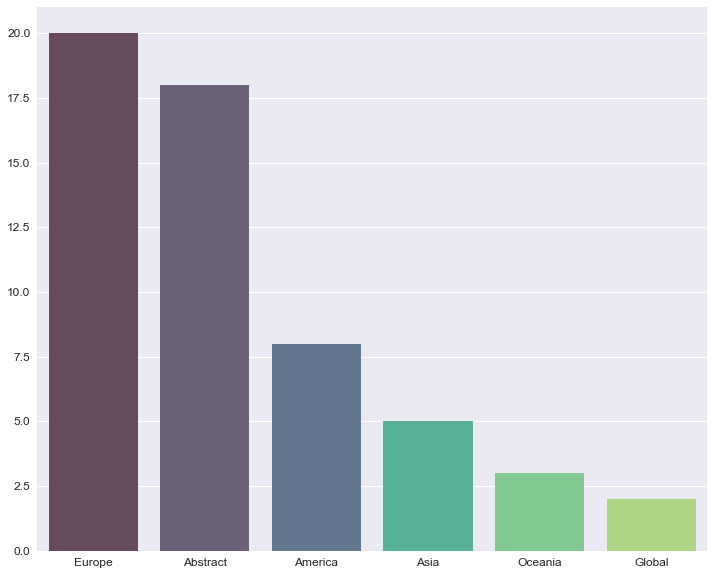

In [36]:
# Tidy up data
data['sim_spatial'] = data.sim_spatial.replace('Crete, Greece' , 'Mediterranean') 
data['sim_spatial'] = data.sim_spatial.replace('Old World (arid/semi-arid regions)' , 'Global') 
data['sim_spatial'] = data.sim_spatial.replace('imaginary geography - fake landscapes' , 'Abstract/Not Geographically Specific') 
data['sim_spatial'] = data.sim_spatial.replace('Mediterranean' , 'Europe - Mediterranean') 

# sort into larger categories
continents = ['Abstract','Europe', 'America', 'Asia', 'Oceania', 'Global']
dict_spatial = {}
for y in data.sim_spatial:
    for i in continents: 
        if i in y:
            dict_spatial.update({y:i})

data['spatial_cat']= data.sim_spatial.map(dict_spatial)

# plot
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.countplot(x = 'spatial_cat', 
                   data = data, 
                   order = data['spatial_cat'].value_counts().index, 
                   palette = pal4)
ax.set(xlabel='', ylabel = '') 

***Figure SI_22: Geographical zones used in ABM models in archaeology.***

In terms of temporal focus, 20% of simulations were set in an abstract space. Among the rest, the Neolithic, and Classical Period are the most common topics. 

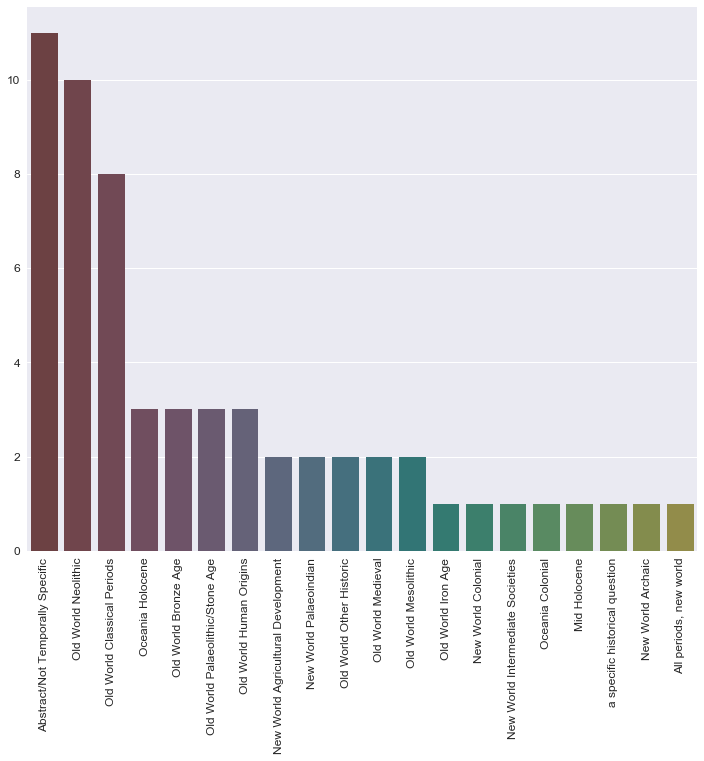

In [37]:
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.countplot(x = 'sim_temporal', 
                   data = data,
                   order = data['sim_temporal'].value_counts().index,
                   palette = pal3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 

***Figure SI_23: Chronological periods used in ABM models in archaeology.***

Here we provide a more detailed breakdown of the results. The three figures (Si_24) show the same data as SI_23 but dividied into the Old World, the New World and Other. 

In [38]:
# Sort the spatio-temporal categories 
times = ['Old World', 'New World', 'Other']
dict_times = {}

for y in data.sim_temporal:
    for i in times: 
        if i.lower() in y.lower():  # make it case insensitive
            dict_times.update({y:i})
            break
        else:
            dict_times.update({y:'Other'})
            
# Map it onto a new column
data['temporal_cat']= data.sim_temporal.map(dict_times)

In the Old World, the Neolithic and the Classic period clearly dominate. Outside of Europe the temporal spread of case studies is fairly uniform. However, in these categories (except for the 'abstract') it is difficult to make any robust conclusions give the low numbers. What is surprising is the relative rarity of North American case studies given that some of the most well-known examples of archaeological ABM and strong ABM research centers are located in North America.  

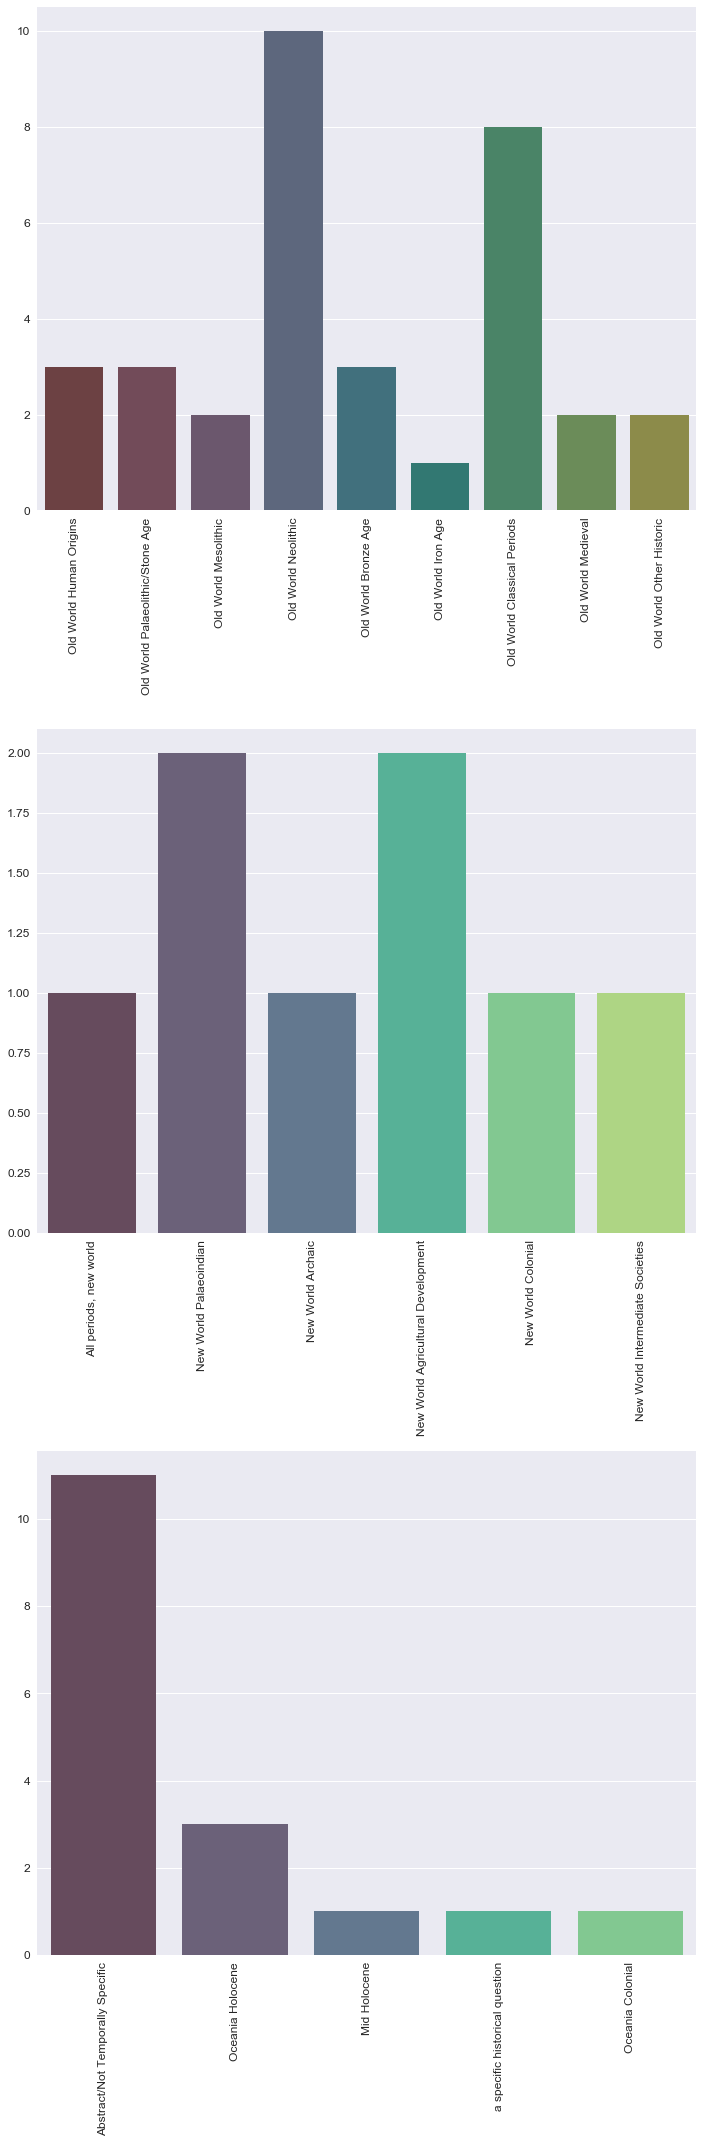

In [39]:
#fig, ax = plt.subplots(3)
plt.figure(figsize = (10, 30))
plt.subplot(3, 1, 1)
ax = sns.countplot(x = 'sim_temporal', 
                   data = data[data['temporal_cat']=='Old World'], 
                   order = ['Old World Human Origins',
                   'Old World Palaeolithic/Stone Age',
                   'Old World Mesolithic', 
                   'Old World Neolithic',
                   'Old World Bronze Age',
                   'Old World Iron Age',
                   'Old World Classical Periods',
                   'Old World Medieval',
                   'Old World Other Historic'], 
                   palette = pal01)#, order = data['sim_temporal'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 

plt.subplot(3, 1, 2)
ax = sns.countplot(x = 'sim_temporal', 
                   data = data[data['temporal_cat']=='New World'], palette = pal4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 

plt.subplot(3, 1, 3)
ax = sns.countplot(x = 'sim_temporal',  
                   data = data[data['temporal_cat']=='Other'], 
                   palette = pal4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel = '') 

plt.tight_layout()

***Figure SI_24: Spatio-temporal categories used in ABM models in archaeology.***

### The scale of simulations

Agenst are predominantly modelled at the micro (individuals) and meso (communities) scales. Note that the fifth category 'an ethnolinguistic unit' has not been indicated by any of the respondents. 
In terms of temporal scales, again individual and community-level time periods are most common. However, the small number of models where one time step is shorter than a day indicate the rarity of, for example, pedestrian models. 

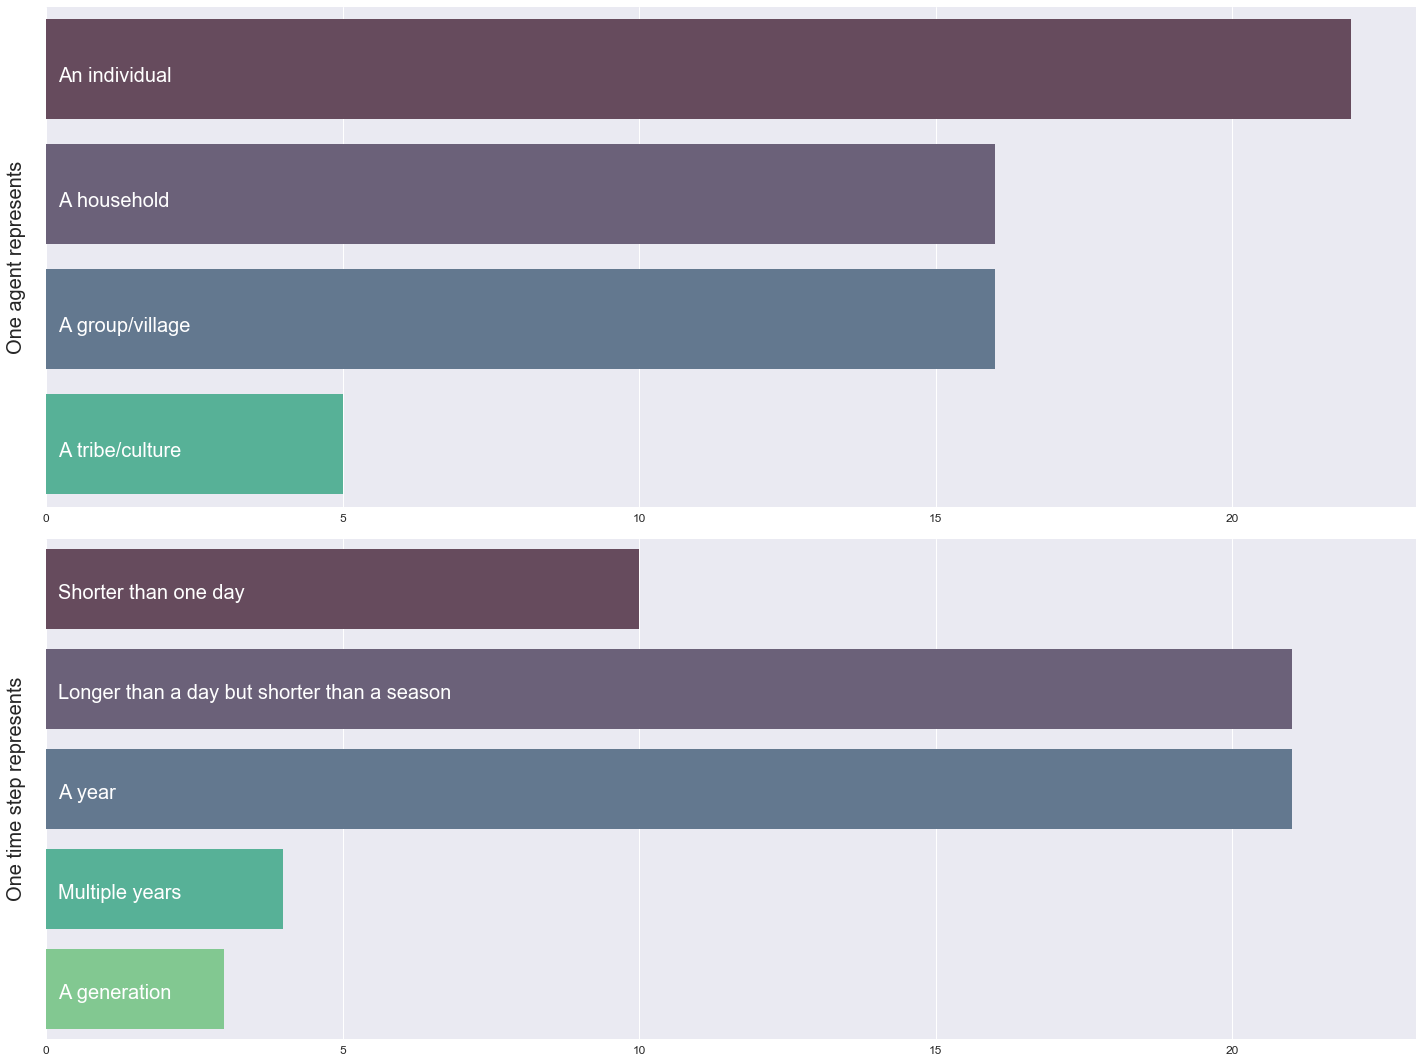

In [40]:
plt.figure(figsize = (20, 15))
sns.set_palette(pal4)

plt.subplot(2, 1, 1)
agents = ['An individual','A household','A group/village', 'A tribe/culture', 'An ethnolinguistic unit']
ax = sns.countplot(y = 'agent', data = data)
ax.set(xlabel='')
ax.set_ylabel ( 'One agent represents',  fontsize = 20,labelpad = 20  )
plt.yticks([], [])
place = 0.1
for i in agents:    
    plt.text(0.2,place, i, fontsize = 20, color='white')
    place +=1
    
plt.subplot(2, 1, 2, sharex=ax)
times = ['Shorter than one day',  'Longer than a day but shorter than a season', 'A year', 'Multiple years','A generation']
ax = sns.countplot(y = 'tick', data = data)
plt.yticks([], [])

place = 0.1
for i in times:    
    plt.text(0.2,place, i, fontsize = 20, color='white')
    place +=1
ax.set(xlabel='') 
ax.set_ylabel ( 'One time step represents',  fontsize = 20, labelpad = 20  )

plt.tight_layout()

***Figure SI_25: Social and temporal scales of ABM models in archaeology.***

### Theory-driven or data-driven?

Validation technique is a good indicator of the type of simulation, i.e., its place on the data-driven to theory-driven spectrum. Thus, abstract models do not require validating (they simply show the logical outcome of the defined interactions). Often 'stylised facts', that is general empirical patterns in the data, are used to validate abstract models which bear some connection to past reality or have been developed to address specific archaeological questions. On the other end of the scale, data-driven models are validated by raw archaeological data or results of data analysis. 

The data indicate a healthy balance between theory-driven and data-driven models.The low number of replications show that the field has not matured enough yet to be 'double checking' its own results. 

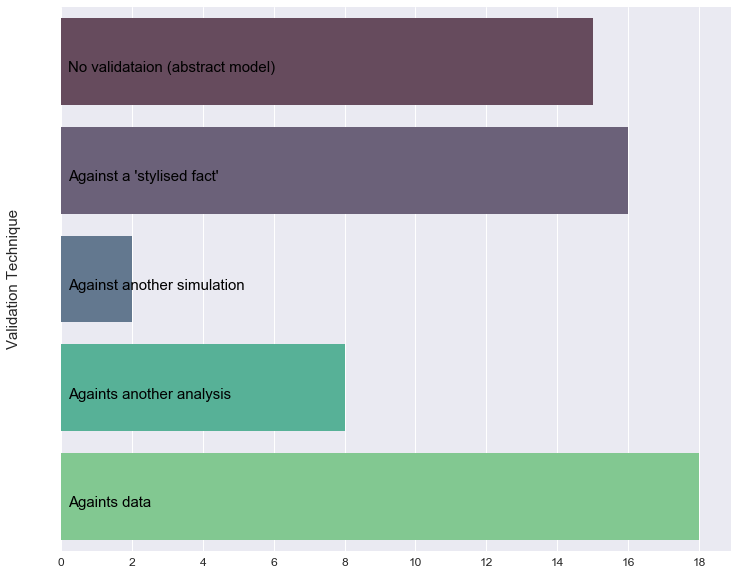

In [41]:
fig, ax = plt.subplots(figsize = (12,10))
data['validation'] = data.validation.replace('Comparison with ethnographic record (demography) ', 'Formal (statistical) comparison with archaeological data')
data['validation'] = data.validation.replace('Comparison with historical data', 'Formal (statistical) comparison with archaeological data')
data['validation'] = data.validation.replace('Two- statistical and comparison to another analysis', 'Formal (statistical) comparison with archaeological data')
data['validation'] = data.validation.replace('Something between the first two options. Not sure if I fully understand the second one.','It was an abstract model not designed to be validated.')
data['validation'] = data.validation.replace('Formal (statistical) comparison with archaeological data', 'Formal (statistical) comparison with data')

ax = sns.countplot(y = 'validation', data = data, 
                   order = ['It was an abstract model not designed to be validated.',
                            "Stylised Fact' (broad generalisation of an empirical pattern)",
                            'Comparison with the results of another simulation',
                            'Comparison with the results of another analysis (e.g., a GIS model)',
                            'Formal (statistical) comparison with data'])

plt.yticks([], [])
validation_tech = ['No validataion (abstract model)', "Against a 'stylised fact'", 'Against another simulation', 'Againts another analysis', 'Againts data']
place = 0.1
for i in validation_tech:    
    plt.text(0.2,place, i, fontsize = 15, color='black')
    place +=1
ax.set(xlabel='') 
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel ( 'Validation Technique',  fontsize = 15, labelpad = 40 )


***Figure SI_26: Validation techniques in archaeological ABMs.***

Finally, we probed the coherence of the community by looking at the recognisability of community-building factors, such as,  tools, repositories, events etc. In general, the community is relatively close-knit, with the majority being aware of the major conferences, online resources and tools etc. The two categories where the 'Never heard of' answer was choosen more frequently is the SAA Digital Data Interest Group, which is a very new initiative (less than a year old, at the time of survey) and the local CAA chapters, which are not active/present in many countries. 

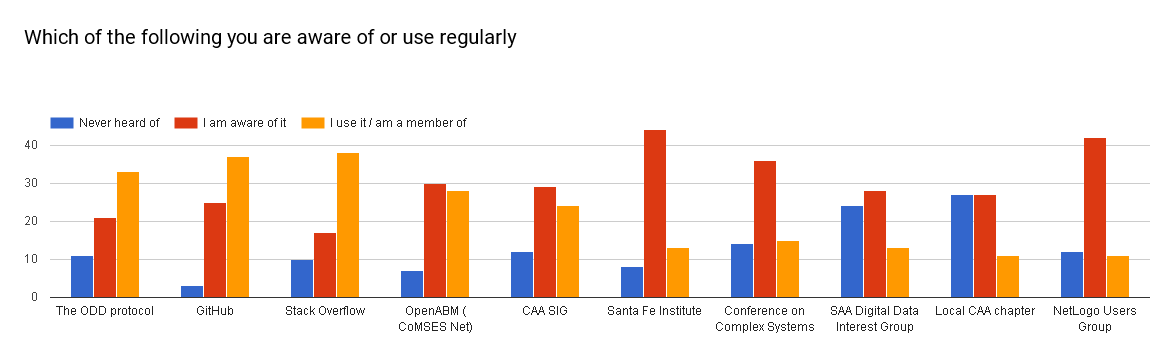

In [42]:
Image("figures/tools.png")
# This image was directly lifted from the google forms. 

***Figure SI_27: Tools and resources used by ABM modellers in archaeology.***